In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.dates as mdates  # Importing module for date formatting
import matplotlib.ticker as ticker  # Importing ticker for customizing colorbar ticks
from scipy.ndimage import gaussian_filter
import glob
from datetime import datetime

In [2]:
temp_anomaly_path = '/glade/work/noteng/masters-research/data/'
#temp-anomaly path
temp_anomaly_file = 'temp-anomaly-march13-march14.nc'
temp_anomaly = xr.open_dataset(temp_anomaly_path+temp_anomaly_file)

In [3]:
temp_anomaly['temp_diff']

<xarray.DataArray 'temp_diff' (time: 1521)>
array([-0.213354, -0.018853,  0.184567, ...,  0.416415,  0.420134,  0.437953],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T04:00:00 ... 2020-03-14T05:20:00

In [4]:
cm = "/glade/derecho/scratch/clackner/lackner_comble/labeled_save/labeled_save.nc"
cloud_mask = xr.open_dataset(cm)
cloud_mask['time'] = pd.to_datetime(cloud_mask['time'], unit='s')

In [5]:
cloud_mask = cloud_mask.sel(time=slice("2020-03-13T04:00:00.000000000", "2020-03-14T05:00:00.000000000"))
cloud_mask = cloud_mask['labeled']

In [6]:
cloud_mask

<xarray.DataArray 'labeled' (time: 18901, h: 245)>
[4630745 values with dtype=int64]
Coordinates:
  * time     (time) datetime64[ns] 2020-03-13T08:00:00 ... 2020-03-14T05:00:00
Dimensions without coordinates: h

# all open cellular cells identified in KAZR

In [7]:
# def time_height_transect(start_time, end_time):
#     # Data path
#     path = "/glade/work/noteng/otengn1/240475/"
#     data = "KAZR/anxarsclkazr1kolliasM1/"
#      # retrieving temperature
#     data2 = "interpsonde/"

#     temp_anomaly_path = '/glade/work/noteng/masters-research/data/'
#     #temp-anomaly path
#     temp_anomaly_file = 'temp-anomaly-march13-march14.nc'
    
    
#     # combine dataset
#     data = glob.glob(f"{path}{data}*.nc")
#     data_sonde = glob.glob(f"{path}{data2}*.nc")
   
#     # ds = xr.open_mfdataset(data, combine='time')
#     ds = xr.open_mfdataset(data)
#     ds1 = xr.open_mfdataset(data_sonde)
#     temp_anomaly = xr.open_dataset(temp_anomaly_path+temp_anomaly_file)

#     # selected time
#     ds = ds.sel(time=slice(start_time, end_time))   
#     ds1 = ds1.sel(time=slice(start_time , end_time))
#     ds2 = temp_anomaly.sel(time=slice(start_time, end_time))
    
#     # data variables
#     reflectivity = ds['reflectivity_best_estimate']
#     doppler_velocity = ds['mean_doppler_velocity']
#     spectral_width = ds['spectral_width']
#     lwp = ds['mwr_lwp']
#     precip = ds['precip_mean']
#     temp = ds1['temp']
#     temp_anomaly_var = ds2['temp_diff']
    
#     # Apply Gaussian smoothing
#     smoothed_reflectivity = gaussian_filter(reflectivity, sigma=0)  # Adjust sigma for desired smoothing level
#     smoothed_doppler_velocity = gaussian_filter(doppler_velocity, sigma=0)  # Adjust sigma for desired smoothing level
#     smoothed_spectral_width = gaussian_filter(spectral_width, sigma=0)  # Adjust sigma for desired smoothing level

#     fig, ax = plt.subplots(figsize=(27, 15), nrows=5, ncols=1, sharex=True)
#     ax = ax.flatten()
    
#     #  # Add text outside the box of the first figure
#     # text = "Example Text"
#     # fig.text(0.5, 1.05, text, fontsize=18, ha='left')

    
#     # print(len(ax)-1) # last axis
#     for i, v in enumerate(ax):
#         labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
    
   
#         # Add text to the subplots
#         ax[i].text(0.004, 0.97, labels[i], transform=ax[i].transAxes,
#                    fontsize=18, va='top', ha='left', fontweight='bold')
#         if i == 0:
#             pcm = ax[i].pcolormesh(ds['time'], reflectivity['height'] / 1000.0, smoothed_reflectivity.T, 
#                                    cmap='nipy_spectral', vmin=-30, vmax=25, zorder=5)
#             # temperature
#             cntr = ax[i].contour(temp['time'][::2], temp['height'][::2], np.transpose(temp.values)[::2, ::2], 
#                           np.round(np.arange(-100,320, 10)), colors='k', linewidths=0.8, linestyles ="dashed", zorder=6)
#             plt.clabel(cntr,inline=1, inline_spacing=8, fontsize=20, fmt='%i',manual=False)
#             ax[i].set_ylim(0, 7)
#             # Set y-axis ticks
#             ax[i].set_yticks(np.arange(1, 8))
#             ax[i].tick_params(axis='y', labelsize=15)
#             ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
#             cbar = fig.colorbar(pcm, ax=ax[i])
#             cbar.set_label('Reflectivity [dBZ]', fontsize=15)
#              # Set colorbar ticks at an interval of 10 (adjust as needed)
#             tick_locator = ticker.MultipleLocator(base=10)
#             cbar.locator = tick_locator
#             cbar.update_ticks()

#         if i == 1:
#             pcm = ax[i].pcolormesh(ds['time'], reflectivity['height']/1000.0, smoothed_doppler_velocity.T,
#                                    cmap='bwr', vmin=-3, vmax=1, zorder=5)
#             ax[i].set_ylim(0, 7)
#             # Set y-axis ticks
#             ax[i].set_yticks(np.arange(1, 8))
#             ax[i].tick_params(axis='y', labelsize=15)
#             ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
#             cbar = fig.colorbar(pcm, ax=ax[i], extend='both')
#             cbar.set_label("Doppler\nVelocity [m s$^{-1}$]", fontsize=15)


#         if i == 2:
#             pcm = ax[i].pcolormesh(ds['time'], reflectivity['height']/1000.0, smoothed_spectral_width.T,
#                                    cmap='Blues', vmin=0, vmax=1, zorder=5)
#             ax[i].set_ylim(0, 7)
#             # Set y-axis ticks
#             ax[i].set_yticks(np.arange(1, 8))
#             ax[i].tick_params(axis='y', labelsize=15)
#             ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
#             cbar = fig.colorbar(pcm, ax=ax[i], extend='max')
#             cbar.set_label("Spectral\nWidth [m s$^{-1}$]", fontsize=15)

#         if i == 3:
#             pcm = ax[i].scatter(lwp['time'], np.divide(lwp.values, 1000), color='blue', zorder=3, s=4)
#             ax[i].set_yticks(np.arange(0, round(np.nanmax(np.divide(lwp.values, 1000)))+0.1, 0.5))
#             ax[i].spines['left'].set_color('blue')
#             ax[i].tick_params(axis='y', colors='blue', labelsize=15)
#             ax[i].set_ylabel("LWP [kg m$^{-2}$]", c = "blue", fontsize=15)
#             cbar = fig.colorbar(pcm, ax=ax[i], extend='neither')
#             # set colorbar to invisible
#             cbar.ax.set_visible(False)
#             ax[3].grid(axis="y", ls = '--', c = "blue",alpha = 0.5)

#             # Create a twin y-axis for ax[2]
#             ax31 = ax[i].twinx()
#             ax31.scatter(lwp['time'], precip, color='black', s=4)
#             ax31.spines['right'].set_color('black')
#             ax31.tick_params(axis='y', colors='black', labelsize=15)
#             ax31.set_ylabel('Precip Rate [mm/hr]', color='black', fontsize=15)  # Label for the twin y-axis
#             ax31.set_yticks(np.arange(0, round(np.max(precip.values))+0.1 ))
#             ax31.grid(axis="y", ls = '--', c = "black",alpha = 0.5)

#         if i == 4:
#             pcm = ax[i].scatter(temp_anomaly_var['time'], temp_anomaly_var.values, color='red', zorder=3, s=4)
#             ax[i].axhline(y=0, color='black', linestyle='--', linewidth=2)
#             ax[i].tick_params(axis='y', colors='black', labelsize=15)

#             latex_part = r"$\theta_v - \overline{\theta_{v,6h}}\,[K]$"
#             anomaly_part = "Temp. Anomaly"
#             ax[i].set_ylabel(f"{anomaly_part}\n{latex_part}", fontsize=15, c='red')
#             ax[i].set_yticks(np.arange(round(np.min(temp_anomaly_var.values)), np.max(temp_anomaly_var.values)))
#             cbar = fig.colorbar(pcm, ax=ax[i], extend='neither')
#             # set colorbar to invisible
#             cbar.ax.set_visible(False)
            
        
            

#         # Custom datetime format
#         custom_date_format = "%H:%M UTC\n%d %B %Y"  # Format: 04:00 UTC\n13 March 2020
#         # Formatting the time labels
#         ax[len(ax)-1].xaxis.set_major_formatter(mdates.DateFormatter(custom_date_format))
#         # Including the first-date and last-date on the plot
#         ax[len(ax)-1].set_xlim([ds['time'].min(), ds['time'].max()])
#         # Set custom tick positions for the x-axis
#         num_ticks = 11  # Number of tick labels
#         tick_positions = np.linspace(0, len(ds['time']) - 1, num_ticks, dtype=int)
#         ax[len(ax)-1].set_xticks(ds['time'][tick_positions])

#         # Generate custom tick labels including the first and last dates
#         tick_labels = [ds['time'][pos].dt.strftime(custom_date_format).values for pos in tick_positions]
#         tick_labels[0] = ds['time'].min().dt.strftime(custom_date_format).values  # First date
#         tick_labels[-1] = ds['time'].max().dt.strftime(custom_date_format).values  # Last date
#         ax[len(ax)-1].set_xticklabels(tick_labels, fontsize=13.5, rotation=0);  # You can adjust fontsize and rotation

#         fig.savefig("open-cells-time-height-transect-all-cells.png", dpi=500, bbox_inches='tight')
    

In [8]:
# %%time
# time_height_transect('2020-03-13T04:00:00.000000000', '2020-03-14T05:00:00.000000000')

In [9]:
def time_height_transect(start_time, end_time):
    # Data path setup
    path = "/glade/work/noteng/otengn1/240475/"
    data_folder = "KAZR/anxarsclkazr1kolliasM1/"
    data2_folder = "interpsonde/"
    temp_anomaly_path = '/glade/work/noteng/masters-research/data/'
    temp_anomaly_file = 'temp-anomaly-march13-march14.nc'

    # adding cloud mask
    cm = "/glade/derecho/scratch/clackner/lackner_comble/labeled_save/labeled_save.nc"
    
    # Globbing data files
    data_files = glob.glob(f"{path}{data_folder}*.nc")
    data_sonde_files = glob.glob(f"{path}{data2_folder}*.nc")
    
    # Opening datasets
    ds = xr.open_mfdataset(data_files, combine='by_coords')
    ds1 = xr.open_mfdataset(data_sonde_files, combine='by_coords')
    temp_anomaly = xr.open_dataset(f"{temp_anomaly_path}{temp_anomaly_file}")

    # added cloud mask
    cloud_mask = xr.open_dataset(cm)
    cloud_mask['time'] = pd.to_datetime(cloud_mask['time'], unit='s')

    # Selecting time slice
    ds = ds.sel(time=slice(start_time, end_time))
    ds1 = ds1.sel(time=slice(start_time, end_time))
    ds2 = temp_anomaly.sel(time=slice(start_time, end_time))
    # added cloud mask
    ds3 = cloud_mask.sel(time=slice(start_time, end_time))
    
    # Extracting variables
    reflectivity = ds['reflectivity_best_estimate']
    doppler_velocity = ds['mean_doppler_velocity']
    spectral_width = ds['spectral_width']
    lwp = ds['mwr_lwp']
    precip = ds['precip_mean']
    temp = ds1['temp']
    temp_anomaly_var = ds2['temp_diff']
    mask_cloud = ds3['labeled']
    # print(mask_cloud)
    
    # Smoothing data
    sigma = 0  # Adjust as necessary
    smoothed_reflectivity = gaussian_filter(reflectivity, sigma=sigma)
    smoothed_doppler_velocity = gaussian_filter(doppler_velocity, sigma=sigma)
    smoothed_spectral_width = gaussian_filter(spectral_width, sigma=sigma)

    # Plotting setup
    fig, ax = plt.subplots(figsize=(27, 15), nrows=6, ncols=1, sharex=True, constrained_layout=True)
    ax = ax.flatten()

    for i, v in enumerate(ax):
        labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
        ax[i].text(0.004, 0.97, labels[i], transform=ax[i].transAxes, fontsize=18, va='top', ha='left', fontweight='bold')
        
        # Plot configurations per subplot
        # Similar structure for plotting as in your provided code with additional comments removed for brevity
        if i == 0:
            pcm = ax[i].pcolormesh(ds['time'], reflectivity['height'] / 1000.0, smoothed_reflectivity.T, 
                                   cmap='nipy_spectral', vmin=-30, vmax=25, zorder=5)
            # temperature
            cntr = ax[i].contour(temp['time'][::2], temp['height'][::2], np.transpose(temp.values)[::2, ::2], 
                          np.round(np.arange(-100,320, 10)), colors='k', linewidths=0.8, linestyles ="dashed", zorder=6)
            plt.clabel(cntr,inline=1, inline_spacing=8, fontsize=20, fmt='%i',manual=False)
            ax[i].set_ylim(0, 7)
            # Set y-axis ticks
            ax[i].set_yticks(np.arange(1, 8))
            ax[i].tick_params(axis='y', labelsize=15)
            ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
            cbar = fig.colorbar(pcm, ax=ax[i])
            cbar.set_label('Reflectivity [dBZ]', fontsize=15)
             # Set colorbar ticks at an interval of 10 (adjust as needed)
            tick_locator = ticker.MultipleLocator(base=10)
            cbar.locator = tick_locator
            cbar.update_ticks()

        if i == 1:
            pcm = ax[i].pcolormesh(ds['time'], reflectivity['height']/1000.0, smoothed_doppler_velocity.T,
                                   cmap='bwr', vmin=-3, vmax=1, zorder=5)
            ax[i].set_ylim(0, 7)
            # Set y-axis ticks
            ax[i].set_yticks(np.arange(1, 8))
            ax[i].tick_params(axis='y', labelsize=15)
            ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
            cbar = fig.colorbar(pcm, ax=ax[i], extend='both')
            cbar.set_label("Doppler\nVelocity [m s$^{-1}$]", fontsize=15)


        if i == 2:
            pcm = ax[i].pcolormesh(ds['time'], reflectivity['height']/1000.0, smoothed_spectral_width.T,
                                   cmap='Blues', vmin=0, vmax=1, zorder=5)
            ax[i].set_ylim(0, 7)
            # Set y-axis ticks
            ax[i].set_yticks(np.arange(1, 8))
            ax[i].tick_params(axis='y', labelsize=15)
            ax[i].set_ylabel('Height [km]', color='black', fontsize=15)  # Label for the twin y-axis
            cbar = fig.colorbar(pcm, ax=ax[i], extend='max')
            cbar.set_label("Spectral\nWidth [m s$^{-1}$]", fontsize=15)

        if i == 3:
            pcm = ax[i].scatter(lwp['time'], np.divide(lwp.values, 1000), color='blue', zorder=3, s=4)
            ax[i].set_yticks(np.arange(0, round(np.nanmax(np.divide(lwp.values, 1000)))+0.1, 0.5))
            ax[i].spines['left'].set_color('blue')
            ax[i].tick_params(axis='y', colors='blue', labelsize=15)
            ax[i].set_ylabel("LWP [kg m$^{-2}$]", c = "blue", fontsize=15)
            ax[i].set_ylim(0, round(np.nanmax(np.divide(lwp.values, 1000)))+0.1)
            ax[3].grid(axis="y", ls = '--', c = "blue",alpha = 0.5)
            

            # Create a twin y-axis for ax[2]
            ax31 = ax[i].twinx()
            ax31.scatter(lwp['time'], precip, color='red', s=4)
            ax31.spines['right'].set_color('red')
            ax31.tick_params(axis='y', colors='red', labelsize=15)
            ax31.set_ylabel('Precip Rate [mm/hr]', color='red', fontsize=15)  # Label for the twin y-axis
            ax31.set_yticks(np.arange(0, round(np.max(precip.values))+0.1 ))
            ax31.set_ylim(0, round(np.max(precip.values))+0.1)
            ax31.grid(axis="y", ls = '--', c = "red",alpha = 0.5)

        if i == 4:
            pcm = ax[i].plot(temp_anomaly_var['time'], temp_anomaly_var.values, color='red', zorder=3)
            ax[i].axhline(y=0, color='black', linestyle='--', linewidth=2)
            ax[i].tick_params(axis='y', colors='black', labelsize=15)

            latex_part = r"$\theta_v - \overline{\theta_{v,6h}}\,[K]$"
            anomaly_part = "Temp. Anomaly"
            ax[i].set_ylabel(f"{anomaly_part}\n{latex_part}", fontsize=15, c='red')
            ax[i].set_yticks(np.arange(round(np.min(temp_anomaly_var.values)), np.max(temp_anomaly_var.values)))


        if i == 5:
             # Set areas where there is no cloud to NaN
            cloud_mask_mod = mask_cloud.where(mask_cloud >= 1, np.nan)
            
            # Apply modulo operation to cycle colors within the range [0, 4]
            cloud_mask_mod = cloud_mask_mod % 5
            pcm = ax[i].pcolormesh(ds3['time'], mask_cloud['h']/1000, cloud_mask_mod.T,
                                   cmap='nipy_spectral')
            # Remove y-axis ticks from the current axis (ax[i])
            ax[i].set_yticks([])
    
        

        
            

    
    # Adjusting x-axis for 6-hour intervals
    time_range = pd.date_range(start=pd.to_datetime(start_time), end=pd.to_datetime(end_time), freq='3H')
    ax[-1].set_xticks(time_range)
    ax[-1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M UTC\n%d %B %Y"))
    ax[-1].set_xticklabels([t.strftime("%H:%M UTC\n%d %B %Y") for t in time_range], fontsize=13.5, rotation=0)
    ax[-1].set_xlim([pd.to_datetime(start_time), pd.to_datetime(end_time)])

    # Saving the figure
    fig.savefig("open-cells-time-height-transect-all-cells1.png", dpi=500, bbox_inches='tight')

CPU times: user 22.6 s, sys: 1.88 s, total: 24.5 s
Wall time: 52.1 s


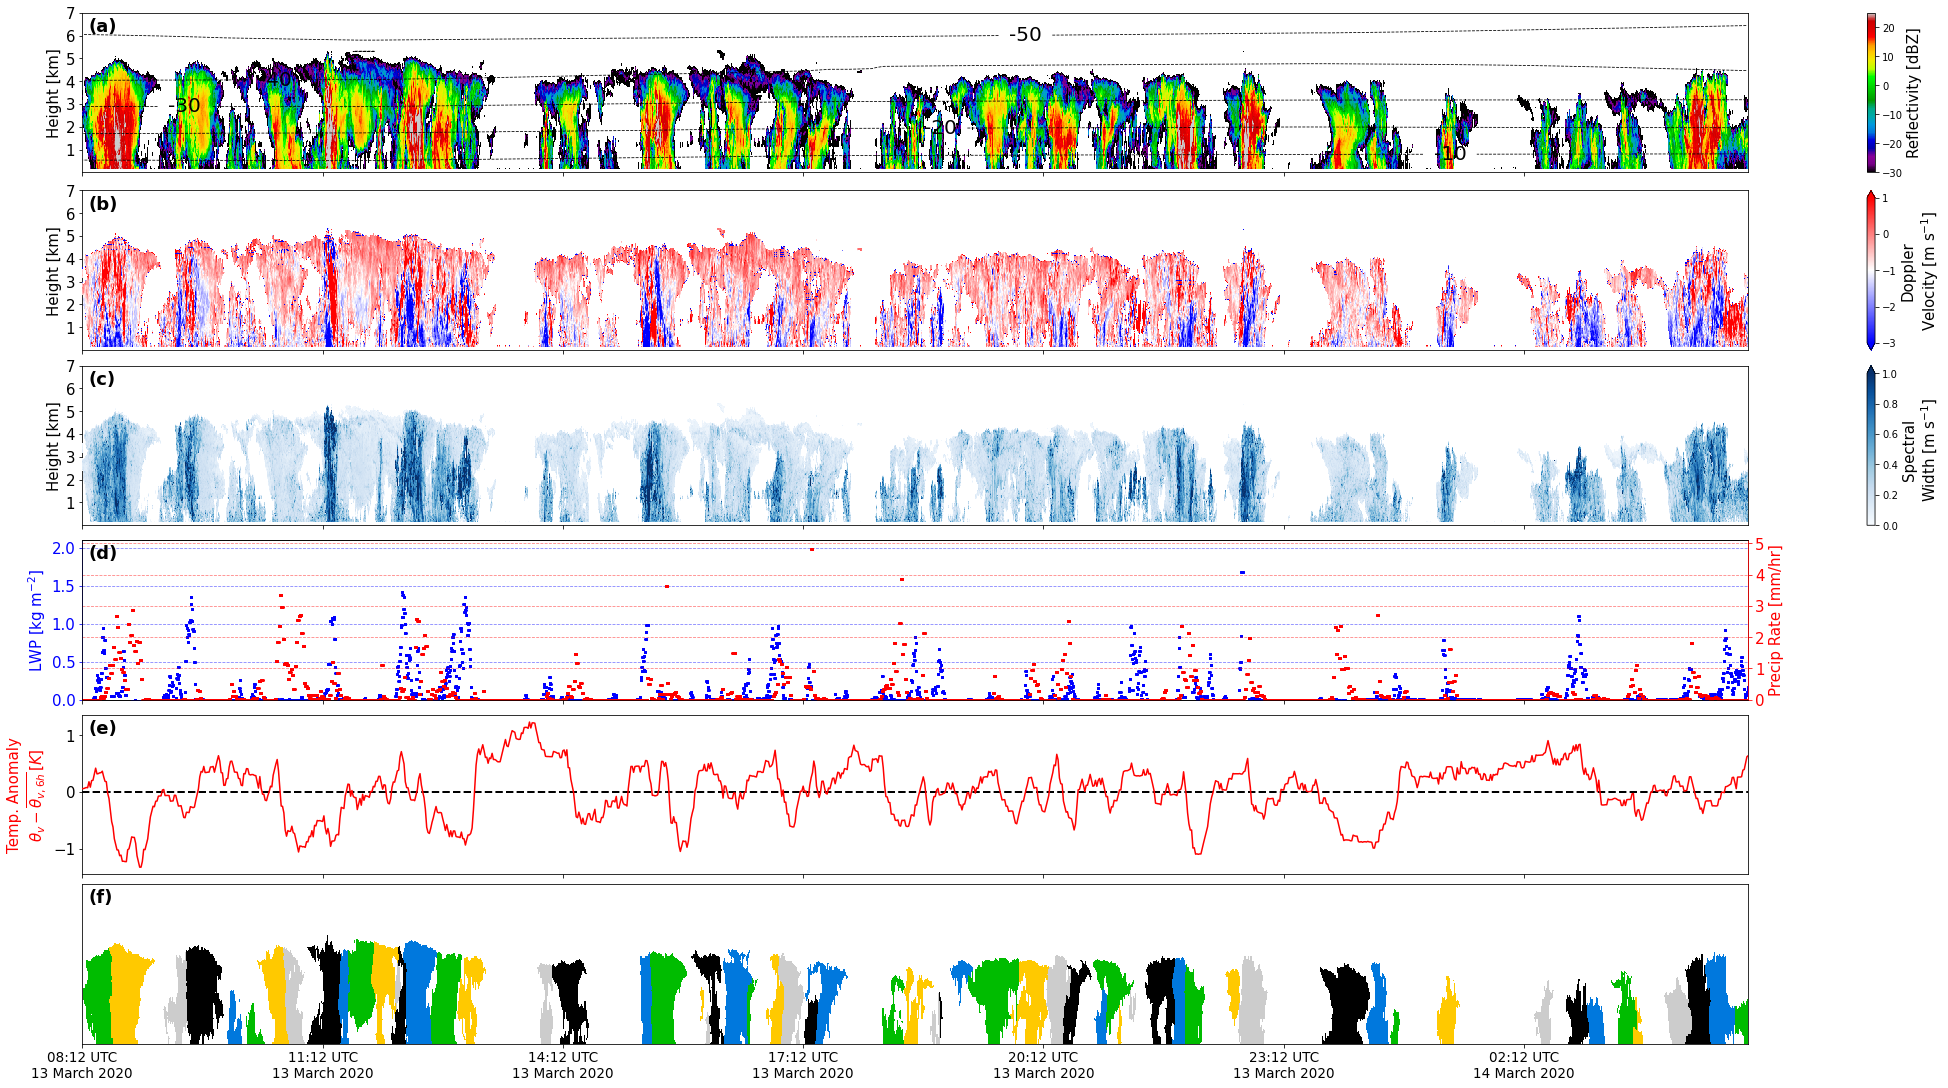

In [10]:
%%time
time_height_transect('2020-03-13T08:12:00.000000000', '2020-03-14T05:00:00.000000000')
# time_height_transect('2020-03-13T04:00:00.000000000', '2020-03-13T10:00:00.000000000')

In [11]:
pwd

'/glade/derecho/scratch/noteng/masters-research/comble/Observation/vertical_transect'